In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
insurance = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/insurance.csv?raw=true')

In [4]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Visualization

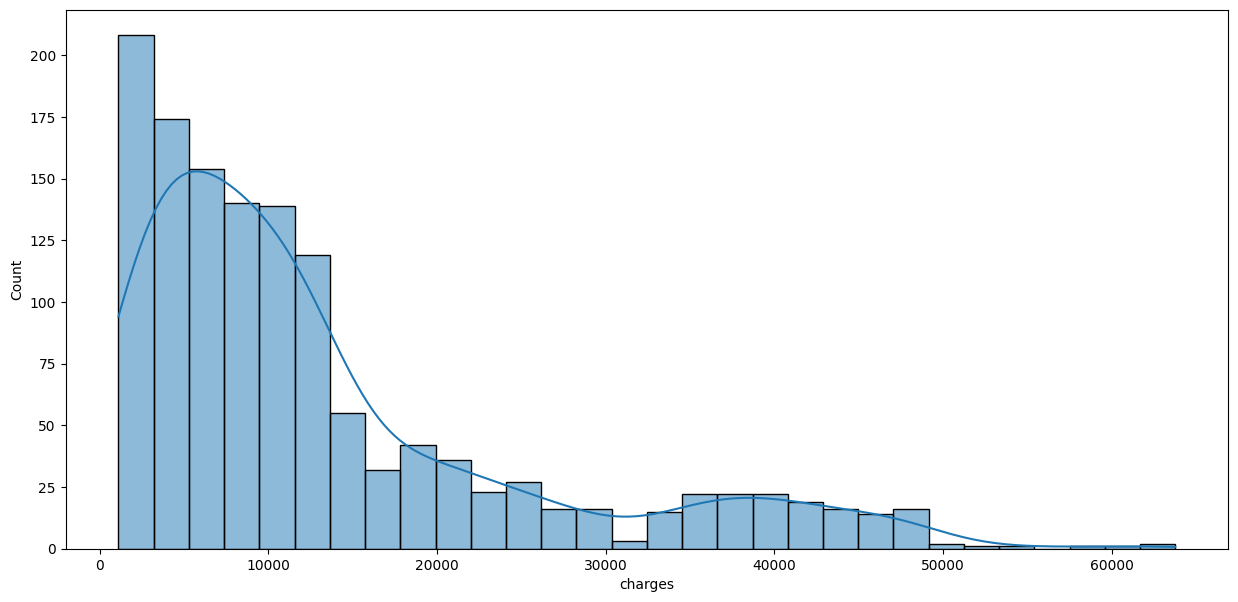

In [7]:

plt.figure(figsize=(15,7))
# create a histogram plot of the Price column
sns.histplot(data=insurance, x="charges", kde=True)

# set the title and labels
plt.title=("Distribution of Insurance Charges")
plt.xlabel=("Charges")
plt.ylabel=("Frequency")

# show the plot
plt.show()

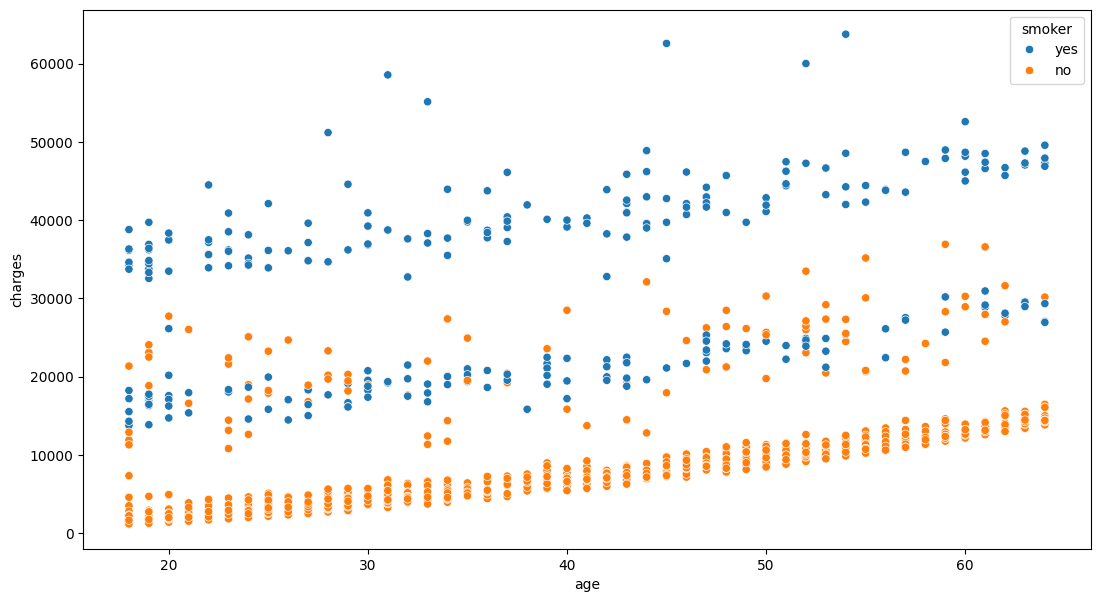

In [8]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=insurance,x="age",y="charges",hue="smoker")
# Set The Title And Label
plt.title=("Age Vs Charges",)
plt.xlabel=("Age")
plt.ylabel=("Charges")
# Display The Plot
plt.show()

TypeError: 'tuple' object is not callable

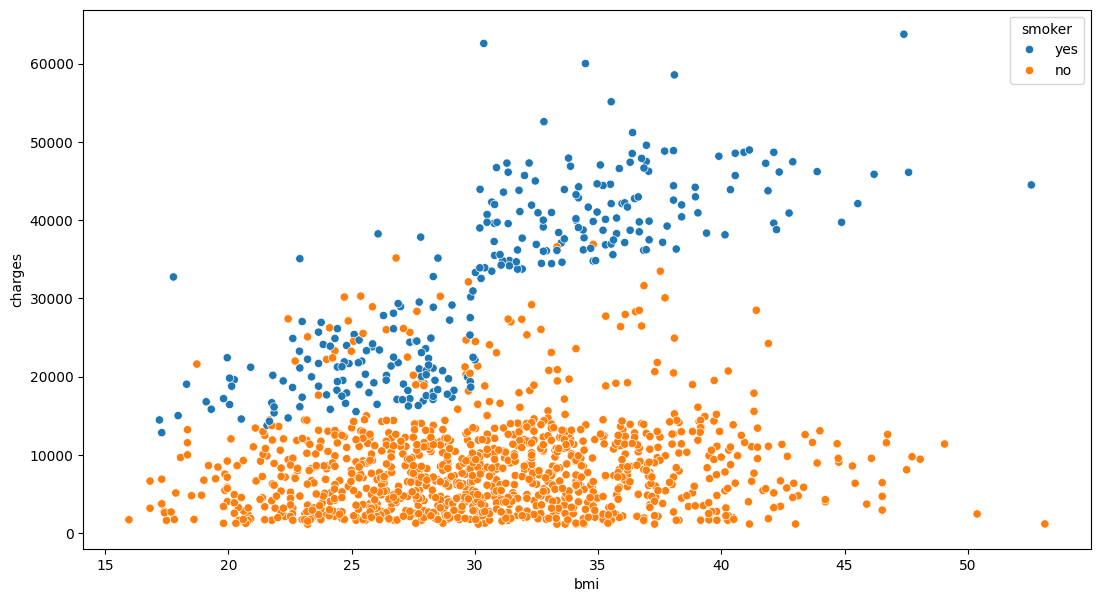

In [9]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=insurance,x='bmi',y='charges',hue='smoker')
plt.title('BMI VS Charges',size=20)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

TypeError: 'tuple' object is not callable

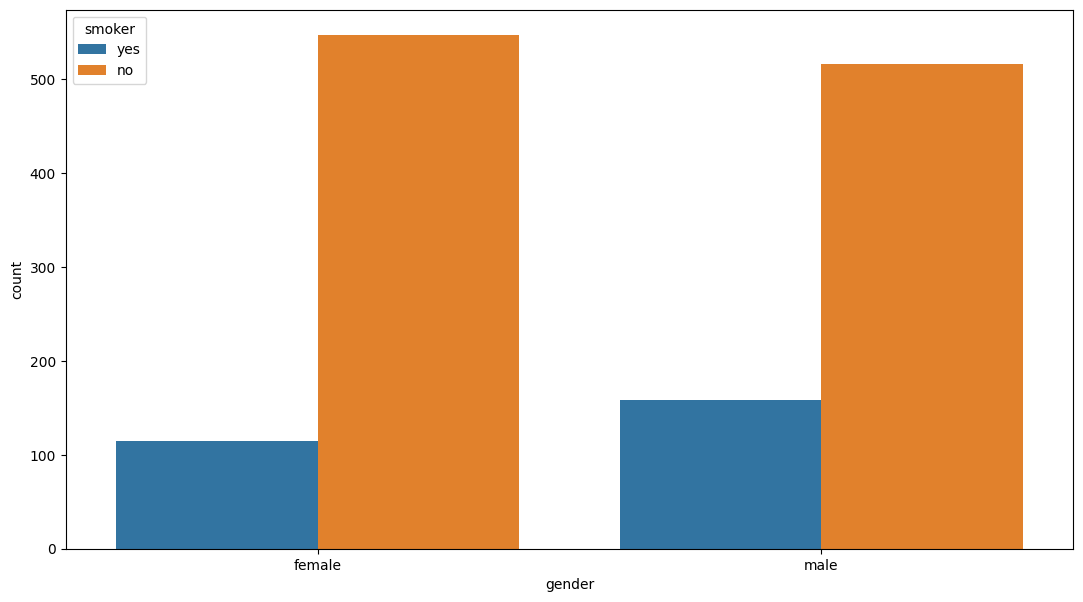

In [10]:
plt.figure(figsize=(13,7))
sns.countplot(data=insurance,x='gender',hue='smoker')
plt.title('No.of Records w.r.t Gender',fontsize=20)
plt.xlabel('Gender')
plt.ylabel('No of records')
plt.show()

TypeError: 'tuple' object is not callable

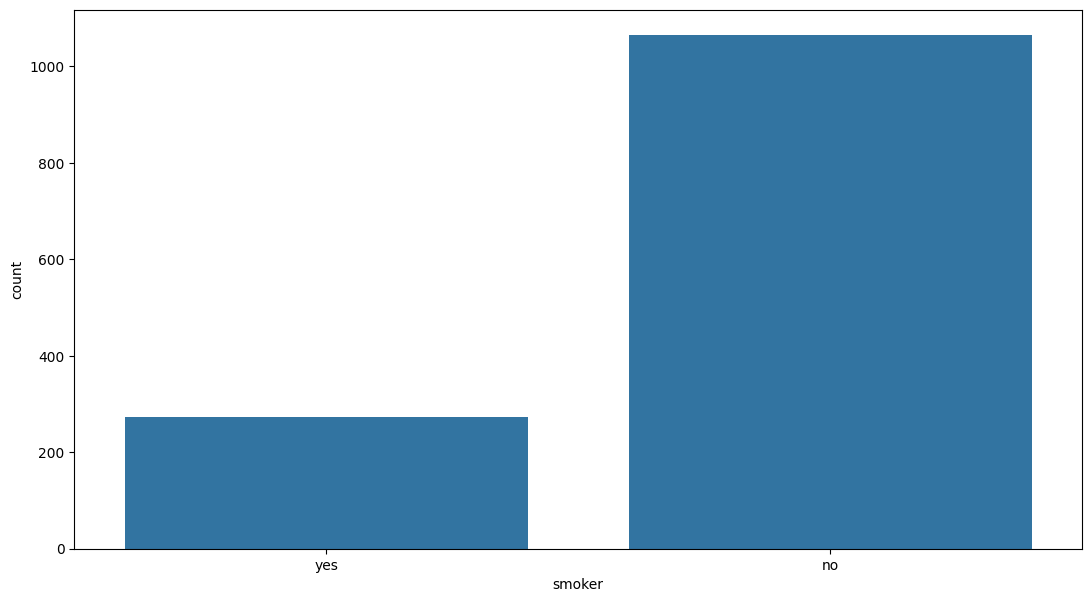

In [11]:
plt.figure(figsize=(13,7))
sns.countplot(data=insurance,x='smoker')
plt.title('No. of Record w.r.t Smoker',size=20)
plt.xlabel('Smoker')
plt.ylabel('No of records')
plt.show()     

# ENCODING DATA

## Label Encoder

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [34]:
label_encoder.fit(insurance['gender'])

LabelEncoder()

In [35]:
insurance['gender'] = label_encoder.transform(insurance['gender'])

In [36]:
label_encoder.fit(insurance['smoker'])
insurance['smoker'] = label_encoder.transform(insurance['smoker'])

In [37]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## One Hot Encoder

In [38]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()

In [39]:
onehot_encoder.fit(insurance[['region']])

OneHotEncoder()

In [40]:
temp = onehot_encoder.transform(insurance[['region']]).toarray()
temp_data

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [41]:
onehot_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [42]:
temp_data = pd.DataFrame(temp,columns = ['northeast', 'northwest','southeast', 'southwest'],dtype='int')

In [43]:
temp_data.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [44]:
insurance = pd.concat([insurance,temp_data],axis=1)

In [45]:
insurance.drop('region',axis=1,inplace=True)

In [46]:
insurance.head()

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [56]:
X = insurance.drop('charges',axis=1)
Y= insurance['charges']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [59]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

In [60]:
linear_regression.fit(X_train,Y_train)

LinearRegression()

In [62]:
prediction=linear_regression.predict(X_test)

In [ ]:
plt.figure(figsize(12,7))
plt.scatter(T_test,prediction,c=X_test['smoker'])
plt.xlabel('original charges')
plt.ylabel('predict')
plt.xlim(